In [345]:
# importing libraries
import os
import re
import codecs
import matplotlib.pyplot as plt
import collections
from string import punctuation
import nltk
from nltk.corpus import stopwords
import pandas as pd
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.corpus import brown
from nltk.corpus import reuters
from nltk.corpus import webtext
from nltk.corpus import gutenberg

words_r = reuters.words()
words_b = brown.words()
words_w = webtext.words()
words_g = gutenberg.words()

brown_words = dict(collections.Counter([lemmatizer.lemmatize(i.lower()) for i in words_b]))
reuters_words = dict(collections.Counter([lemmatizer.lemmatize(i.lower()) for i in words_r]))
web_words = dict(collections.Counter([lemmatizer.lemmatize(i.lower()) for i in words_w]))
guten_words = dict(collections.Counter([lemmatizer.lemmatize(i.lower()) for i in words_g]))

import spacy
nlp = spacy.load("en_core_web_sm")
stop = set(stopwords.words('english'))

%matplotlib inline

In [346]:
stop_brown = [i[0] for i in sorted(brown_words.items(), key=lambda k: k[1], reverse=True) if i[1] > 100]
stop_reuters = [i[0] for i in sorted(reuters_words.items(), key=lambda k: k[1], reverse=True) if i[1] > 250]
stop_web = [i[0] for i in sorted(web_words.items(), key=lambda k: k[1], reverse=True) if i[1] > 50]
stop_guten = [i[0] for i in sorted(guten_words.items(), key=lambda k: k[1], reverse=True) if i[1] > 100]

len(stop_brown), len(stop_reuters), len(stop_web), len(stop_guten)

(1134, 798, 833, 1857)

In [347]:
# sorted(guten_words.items(), key=lambda k: k[1], reverse=True)

In [348]:
# collections.Counter([i[1] for i in sorted(brown_words.items(), key=lambda k: k[1], reverse=True)])

In [361]:
BASE_DIR = 'data'
DATA_DIR = codecs.open(os.path.join(BASE_DIR, 'books/2600.txt'), 'rb', encoding='utf-8').readlines()
COMMON_DIR = codecs.open(os.path.join(BASE_DIR, 'google_10000.txt'), 'rb', encoding='utf-8').readlines()
true_data = pd.read_csv(os.path.join(BASE_DIR, 'ground_truth/2600.csv'), sep='\t')
stop_words = codecs.open(os.path.join(BASE_DIR, 'stop.txt'), 'rb', encoding='utf-8').readlines()

In [362]:
stop.update(list(set([i.strip().lower() for i in stop_words])))
stop.update(list(set([i.strip().lower() for i in stop_brown])))
stop.update(list(set([i.strip().lower() for i in stop_web])))
stop.update(list(set([i.strip().lower() for i in stop_reuters])))
stop.update(list(set([i.strip().lower() for i in stop_guten])))

In [363]:
len(set(stop))

3131

In [364]:
true_data_lst = true_data.iloc[:, 0].tolist()


In [365]:
# true_data_lst = set(true_data_lst)

In [366]:
# remove = ['amble',
#  'animagus',
#  'bewilder',
#  'blimy',
#  'boater',
#  'chipolata',
#  'chortle',
#  'confiscate',
#  'crane',
#  'cringe',
#  'crumpet',
#  'daily prophet, the',
#  'engulf',
#  'ensnare',
#  'festoon',
#  'fixedly',
#  'gibber',
#  'hoodlum',
#  'jostle',
#  'kip',
#  'knickerbocker glory',
#  'knobbly',
#  'knut',
#  'ledger',
#  'mangled',
#  'miniscule',
#  'peppermint humbug',
#  'phial',
#  'prod',
#  'ruffled',
#  'sprint',
#  'totter',
#  'transfix',
#  'tureen',
#  'turret',
#  'vigorous']
true_data_lst = [i for i in true_data_lst if i not in remove]

In [367]:
len(true_data_lst)

20

In [369]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
punctuation = "'!()-[]{};:'\,<>./?@#$%^&*_~"

def expand_contractions(data_str):
    specials = ["’", "‘", "´", "`", "’"]
    for s in specials:
        data_str = data_str.replace(s, "'")
    data_str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in data_str.split(" ")])
    return data_str

def extra_spaces(data_str):
    return re.sub(r'\s{1,}', ' ', data_str)

def punctuations(data_str):
    data_str = data_str.replace("'s", "")
    for x in data_str.lower():
        if x in punctuation: 
            data_str = data_str.replace(x, "")
    return data_str

def remove_stop(data_str):
    word_tokens = nltk.word_tokenize(data_str)
    filtered_sentence = [w for w in word_tokens if not w in stop] 
    return ' '.join(filtered_sentence)

def preprocess(data_str):
    data_str = expand_contractions(data_str)
    data_str = remove_stop(data_str)
    data_str = punctuations(data_str)
    data_str = extra_spaces(data_str)
    return data_str

def precision(pred, actual):
    N = [i for i in pred if i in actual]
    _D = [i for i in pred if i not in actual]
    return len(N) / (len(N)+len(_D)), N, _D

def recall(pred, actual):
    N = [i for i in pred if i in actual]
    _D = [i for i in actual if i not in pred]
    return len(N) / (len(N)+len(_D)), N, _D

def f1score(precision, recall):
    return (2*precision*recall) / (precision + recall)

def ner(data):
    ner_chunks = set()
    ner_chunks_cat = set()
    doc = nlp(data)
    for ent in doc.ents:
        ner_chunks.add(ent.text)
        ner_chunks_cat.add(ent.label_)
    return ner_chunks, ner_chunks_cat

full_data = ' '.join([i.strip() for i in DATA_DIR if len(i.strip())>1])
# ner_chunks, ner_chunks_cat = ner(full_data)
# for i in ner_chunks:
#     full_data = full_data.replace(i, '')
full_data = full_data.lower()
data = nltk.sent_tokenize(full_data)
#data = [i for i in data]

In [370]:
# FAILED
# from gensim.summarization import keywords
# np_chunks = keywords(' '.join(data), ratio=1, lemmatize=True).split('\n')

In [371]:
# #####
# # np_chunks = set()
# # doc = nlp(data)
# # for chunk in doc.noun_chunks:
# #     np_chunks.add(chunk.text)

# ######
# #np_chunks = set(nltk.word_tokenize(data))

# ######
np_chunks = []
is_noun = lambda pos: pos[:2] in ['NN', 'NNS', 'JJ']
for sent in data:
    tokenized = nltk.word_tokenize(sent)
    np_chunks.append([word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)])

In [372]:
np_chunks = set([lemmatizer.lemmatize(item.strip(punctuation)) for sublist in np_chunks for item in sublist])
np_chunks = [i for i in np_chunks if '-' not in i]

In [373]:
len(np_chunks)

14489

In [374]:
prec, TP, FP = precision(np_chunks, true_data_lst)
rec, TP, FN = recall(np_chunks, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")


Precision = 0.0006901787562978812
Recall = 0.5
F1 = 0.0013784547522227584
TP=10, FP=14479, FN=10


In [375]:
def preprocess(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if i not in stop and '-' not in i and len(i) > 3:
            keep.append(i)
        else:
            remove.append(i)
    return keep, remove

data_preprocess_removed, preprocess_removed = preprocess(np_chunks)

In [376]:
len(data_preprocess_removed), len(preprocess_removed)

(12356, 2133)

In [377]:
prec, TP, FP = precision(data_preprocess_removed, true_data_lst)
rec, TP, FN = recall(data_preprocess_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.0008093234056328909
Recall = 0.5
F1 = 0.0016160310277957338
TP=10, FP=12346, FN=10


In [378]:
common = [i.strip() for i in COMMON_DIR]

def remove_google_common(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if i not in common:
            keep.append(i)
        else:
            remove.append(i)
            
    return keep, remove

data_common_removed, common_removed = remove_google_common(data_preprocess_removed)

In [379]:
len(data_common_removed), len(common_removed)

(10514, 1842)

In [380]:
prec, TP, FP = precision(data_common_removed, true_data_lst)
rec, TP, FN = recall(data_common_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.0009511128019783146
Recall = 0.5
F1 = 0.0018986140117714068
TP=10, FP=10504, FN=10


In [315]:
ner_chunks = set()
ner_chunks_cat = set()
for sent in data:
    doc = nlp(sent)
    for ent in doc.ents:
        ner_chunks.add(ent.text)
        ner_chunks_cat.add(ent.label_)

In [316]:
len(ner_chunks)

68

In [317]:
def remove_ner(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if i not in ner_chunks:
            keep.append(i)
        else:
            remove.append(i)
    return keep, remove

data_ner_removed, ner_removed = remove_ner(data_common_removed)

In [318]:
len(data_ner_removed), len(ner_removed)

(1601, 1)

In [319]:
ner_removed

['daytime']

In [320]:
prec, TP, FP = precision(data_ner_removed, true_data_lst)
rec, TP, FN = recall(data_ner_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.0037476577139287947
Recall = 0.13636363636363635
F1 = 0.007294832826747721
TP=6, FP=1595, FN=38


In [381]:
wc = dict(collections.Counter(nltk.word_tokenize(' '.join([lemmatizer.lemmatize(i).strip(punctuation) for i in ' '.join(data).split()]))))
# maxx = sorted(wc.items(), key=lambda k: k[1], reverse=True)[0][1]
# wc_freq = {k: v/maxx for k, v in wc.items()}

# plt.bar(range(len(wc_freq)), list(wc_freq.values()), align='center')
# plt.xticks(range(len(wc_freq)), list(wc_freq.keys()))

# plt.show()

In [322]:
# def remove_high_low_freq(np_chunks):
#     keep, remove = [], []
#     for i in np_chunks:
#         if i in wc_freq:
#             if wc_freq[i] < 0.95:
#                 keep.append(i)
#             else:
#                 remove.append(i)
#         else:
#             remove.append(i)
#     return keep, remove


# data_freq_removed, freq_removed = remove_high_low_freq(data_preprocess_removed)

In [323]:
# for i in data_freq_removed:
#     if '-' in i:
#         print (i)

In [324]:
# len(data_freq_removed), len(freq_removed)

In [325]:
# prec, TP, FP = precision(data_freq_removed, true_data_lst)
# rec, TP, FN = recall(data_freq_removed, true_data_lst)

# print (f"Precision = {prec}")
# print (f"Recall = {rec}")
# print (f"F1 = {f1score(prec, rec)}")
# print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

In [382]:
def remove_repeated_noisy_chars(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if len(re.findall(r'(.)\1{2,}', i)):
            remove.append(i)
        else:
            keep.append(i)
    return keep, remove

data_noisy_removed, noisy_removed = remove_repeated_noisy_chars(data_ner_removed)

In [383]:
len(data_noisy_removed), len(noisy_removed)

(1595, 6)

In [384]:
prec, TP, FP = precision(data_noisy_removed, true_data_lst)
rec, TP, FN = recall(data_noisy_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.0
Recall = 0.0


ZeroDivisionError: float division by zero

In [329]:
def remove_specific_corpus(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if i in wc:
            c1 = wc[i]
            if i in brown_words:
                c2 = brown_words[i]
                if c1 > c2:
                    keep.append(i)
                else: remove.append(i)
            else:
                keep.append(i)
        else:
            keep.append(i)
            
    return keep, remove

data_specific_removed, specific_removed = remove_specific_corpus(data_noisy_removed)

In [330]:
len(data_specific_removed), len(specific_removed)

(614, 981)

In [331]:
prec, TP, FP = precision(data_specific_removed, true_data_lst)
rec, TP, FN = recall(data_specific_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.008143322475570033
Recall = 0.11363636363636363
F1 = 0.01519756838905775
TP=5, FP=609, FN=39


In [273]:
Precision = 0.05714285714285714
Recall = 0.46153846153846156
F1 = 0.10169491525423728
TP=30, FP=495, FN=35

# data_specific_removed

In [138]:
import textstat

FP_dist_syllable = {}
for d in FP:
    syllables = textstat.syllable_count(d)
    if syllables in FP_dist_syllable :
        FP_dist_syllable[syllables] += 1
    else:
        FP_dist_syllable[syllables] = 1
        
TP_dist_syllable = {}
for d in TP:
    syllables = textstat.syllable_count(d)
    if syllables in TP_dist_syllable :
        TP_dist_syllable[syllables] += 1
    else:
        TP_dist_syllable[syllables] = 1

FN_dist_syllable = {}
for d in FN:
    syllables = textstat.syllable_count(d)
    if syllables in FN_dist_syllable :
        FN_dist_syllable[syllables] += 1
    else:
        FN_dist_syllable[syllables] = 1

In [139]:
FP_dist_syllable

{3: 74, 2: 292, 1: 237, 4: 12, 6: 1}

In [140]:
TP_dist_syllable

{1: 15, 2: 20, 3: 5, 5: 1, 4: 1}

In [141]:
FN_dist_syllable

{2: 9, 3: 6, 1: 8}

In [142]:
FP_dist_length = {}
for d in FP:
    length = len(d)
    if length in FP_dist_length:
        FP_dist_length[length] += 1
    else:
        FP_dist_length[length] = 1
        
TP_dist_length = {}
for d in TP:
    length = len(d)
    if length in TP_dist_length:
        TP_dist_length[length] += 1
    else:
        TP_dist_length[length] = 1

FN_dist_length = {}
for d in FN:
    length = len(d)
    if length in FN_dist_length:
        FN_dist_length[length] += 1
    else:
        FN_dist_length[length] = 1

In [156]:
FP_dist_length, TP_dist_length, FN_dist_length

({9: 70, 7: 121, 4: 40, 8: 100, 5: 100, 6: 127, 10: 39, 11: 9, 14: 1, 12: 9},
 {7: 9, 6: 9, 10: 5, 4: 2, 9: 8, 5: 4, 8: 3, 15: 1, 11: 1},
 {8: 4, 9: 2, 7: 4, 6: 5, 13: 1, 4: 2, 3: 1, 5: 4})

In [289]:
import pronouncing
count = collections.Counter()


feature = {}
for keyword in data_specific_removed:
    f1 = len(keyword)
    f2 = textstat.syllable_count(keyword)
    pronunciation_list = pronouncing.phones_for_word(keyword)
    if len(pronunciation_list) > 0:
        for p in pronunciation_list:
            count.update(p.split(" "))
        f3 = len(count)
    else:
        f3 = 0
    
    if keyword not in feature:
        feature[keyword] = [f3]
    else:
        feature[keyword].append([f3])

In [290]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = np.array([v for k,v in feature.items()])

mms = MinMaxScaler()
mms.fit(X)
X = mms.transform(X)

Sum_of_squared_distances = []
for cluster in range(2,5):  
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    data_kmeans_removed, kmeans_removed = [], []
    for cluster_no in range(0, cluster):
        data_kmeans_removed =[]
        for data, label in zip(feature.keys(), kmeans.labels_):
            if label == cluster_no:
                data_kmeans_removed.append(data)
        prec, TP, FP = precision(data_kmeans_removed, true_data_lst)
        rec, TP, FN = recall(data_kmeans_removed, true_data_lst)

        print (f"Cluters: {cluster} - Testing with Label as {cluster_no}")
        print (f"Precision = {prec}")
        print (f"Recall = {rec}")
        print (f"F1 = {f1score(prec, rec)}")
        print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")
        print ()
        
# Precision = 0.05714285714285714
# Recall = 0.46153846153846156
# F1 = 0.10169491525423728
# TP=30, FP=495, FN=35

Cluters: 2 - Testing with Label as 0
Precision = 0.06756756756756757
Recall = 0.23076923076923078
F1 = 0.10452961672473866
TP=15, FP=207, FN=50

Cluters: 2 - Testing with Label as 1
Precision = 0.04950495049504951
Recall = 0.23076923076923078
F1 = 0.08152173913043478
TP=15, FP=288, FN=50

Cluters: 3 - Testing with Label as 0
Precision = 0.06880733944954129
Recall = 0.23076923076923078
F1 = 0.10600706713780919
TP=15, FP=203, FN=50

Cluters: 3 - Testing with Label as 1
Precision = 0.05223880597014925
Recall = 0.2153846153846154
F1 = 0.08408408408408409
TP=14, FP=254, FN=51

Cluters: 3 - Testing with Label as 2
Precision = 0.02564102564102564
Recall = 0.015384615384615385
F1 = 0.019230769230769232
TP=1, FP=38, FN=64

Cluters: 4 - Testing with Label as 0
Precision = 0.05128205128205128
Recall = 0.06153846153846154
F1 = 0.055944055944055944
TP=4, FP=74, FN=61

Cluters: 4 - Testing with Label as 1
Precision = 0.06912442396313365
Recall = 0.23076923076923078
F1 = 0.10638297872340427
TP=15, FP

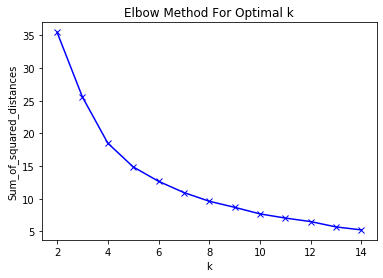

In [278]:
plt.plot(range(2,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [281]:
data_kmeans_removed

[]

In [ ]:
from gensim.models import FastText
data_tokenized = [d.split() for d in data]
model_ted = FastText(data_tokenized, size=100, window=5, min_count=5, workers=4,sg=1)

In [884]:
can_be_removed = {}
s=[]
for i in FP:
    nearest = [i[0].strip(punctuation) for i in model_ted.wv.most_similar(i)[:3]]
    print (i, nearest)
    s.append(len([j for j in nearest if j in FP and j!=i]))
    print ([j for j in nearest if j in FP and j!=i])
    print ()

scuffle ['house', 'forest', 'nearest']
[]

toad ['neck', 'furious', 'too']
['furious']

crybaby ['busy', 'change', 'him']
[]

puzzlement ['green', 'on', 'sudden']
[]

woodcraft ['hundred', 'storm', 'piers']
[]

boiling ['dressed', 'portrait', 'hundred']
[]

thinner ['wore', 'do', 'somewhere']
[]

supple ['known', 'me', 'know.”']
[]

feverishly ['answer', 'owls', 'out']
[]

miffed ['wizarding', 'guarding', 'become']
['wizarding', 'guarding']

fond ['rob', 'following', 'ceiling']
[]

unpopular ['by', 'with', 'dursleys’']
[]

hatred ['ignored', 'dressed', 'shivered']
[]

fateful ['way', 'voice', 'saw']
[]

bloke ['lit', 'sit', 'hit']
[]

pheasant ['giant', 'miss', '“get']
[]

gran ['twins', 'crowd', 'poor']
[]

speedy ['tail', 'shook', 'second']
[]

porridge ['hair', 'open', 'pressed']
[]

warty ['live', 'nicolas', 'shows']
['nicolas']

rejoice ['smell', 'fall', 'hut']
[]

gallopin ['flitwick', 'flitwick', 'less']
['flitwick', 'flitwick']

grin ['eyes', '1', 'place']
[]

flagged ['whisper

bane ['sofa', 'dormitory', 'smiling']
['dormitory']

checkup ['old', 'letters', 'without']
[]

ragged ['shot', 'platform', 'potions']
[]

circe ['stay', 'afternoon', 'back']
[]

cloak ['pocket', 'inside', 'arm']
[]

colder ['open', 'air', 'grab']
[]

rang ['swung', 'morning', 'leading']
[]

sherry ['malfoy', 'hermione', 'quirrell']
['malfoy', 'hermione', 'quirrell']

bowler ['let', 'shoulder', 'sank']
[]

scissors ['quirrell', 'tall', 'quirrell']
['quirrell', 'quirrell']

hermione ['hermione', 'hermione', 'hermione’s']
[]

accountant ['seeker', 'before', 'to']
[]

smarmy ['petunia', 'petunia', 'petunia']
['petunia', 'petunia', 'petunia']

dearest ['shot', 'platform', 'potions']
[]

hourglass ['fell', 'bottle', 'wide']
[]

nothin ['anythin’', 'nothin’', 'thin']
[]

minuscule ['another', 'father’s', 'either']
[]

turret ['nine', 'in', 'shook']
[]

sirius ['gone', 'hate', 'hat']
[]

muffled ['free', 'carefully', 'match']
[]

tortoise ['wand', 'kept', 'feet']
['wand']

goblin ['goblins', '

candlelight ['package', 'piers', 'path']
[]

softest ['power', 'powerful', 'gold']
[]

studyin ['much', 'use', 'how']
[]

thicker ['steps', 'crack', 'air']
[]

happiest ['cup', 'ten', 'families']
[]

crutch ['hundreds', 'twin', 'blue']
[]

corridor ['corridor', 'corridor', 'corridors']
[]

feast ['green', 'nose', 'made']
[]

goin ['yeh', 'want', 'know']
[]

boredom ['vault', 'stone', '11']
[]

idiot ['potter', 'said', 'potter’s']
[]

nephew ['boy', 'weasley', '“then']
['weasley']

dessert ['dead', 'night', 'night']
[]

rounded ['broom', 'face', 'broom']
['broom', 'broom']

parchment ['inches', 'footsteps', 'sound']
[]

dentist ['over', 'head', 'fat']
[]

spectacle ['man', 'clothes', 'themselves']
[]

forgive ['seeker', 'move', 'do']
[]

doin ['don’t', 'know', '“i']
[]

marge ['pair', 'side', 'pockets']
[]

tweak ['figure', 'wizarding', 'dream']
['wizarding']

whippy ['fell', 'sound', 'bottle']
[]

scratchy ['stand', 'windows', 'window']
[]

conk ['seven', 'stop', 'low']
[]

spurt ['eve

[]

chappie ['trouble', 'terrible', 'words']
[]

chattering ['brooms', 'broomstick', 'brooms']
['broomstick']

grunt ['afternoon', 'mouth', 'disappeared']
[]

judging ['windows', 'boats', 'boa']
[]

chessman ['portrait', 'boy', 'platform']
[]

blew ['glass', 'cross', 'crate']
['crate']

immortal ['tall', 'shall', 'tall']
[]

witchcraft ['car', 'scar', 'brooms']
['scar']

cabbage ['shoulders', 'sister', 'players']
[]

chatter ['now.”', 'meet', 'wore']
[]

breezy ['aunt', 'bent', 'seized']
['seized']

blob ['either', 'either', 'there!”']
[]

treble ['found', 'face', 'eyes']
[]

blankly ['step', 'steps', 'crack']
[]

teabags ['fear', 'hold', 'time']
[]

heartstrings ['spells', 'scarlet', 'teeth']
['scarlet']

absurd ['got', 'wanted', 'letter']
[]

mouthful ['top', 'slid', 'footsteps']
[]

rasping ['other', 'fact', 'noses']
[]

invisibility ['apart', 'slowly', 'arrived']
[]

weirdo ['seven', 'one', 'none']
[]

snout ['car', 'for', 'catch']
[]

loopy ['since', 'happened', 'happy']
[]

pucey

unpleasant ['try', '“give', 'give']
[]

cane ['asked', 'did', 'weren’t']
[]

downpour ['hair', 'open', 'covered']
[]

tremblin ['earth', 'finnigan', 'answer']
['finnigan']

moldy ['hold', 'old', 'learn']
[]

beware ['shouldn’t', 'doesn’t', 'wouldn’t']
[]

snore ['“ah', 'lucky', 'miss']
[]

flute ['mind', '“three', 'stop']
[]

nicolas ['ago', 'voldemort’s', 'peeves']
[]

poorer ['’em', 'years', 'muggle']
[]

pinprick ['hole', 'green', 'class']
[]

flatten ['run', 'fact', 'attention']
[]

postman ['below', 'dog', 'idea']
[]

instinct ['moment', 'kept', 'mention']
[]

swallow ['man', 'dream', 'solid']
[]

eaten ['reason', 'those', 'much']
[]

swipe ['hagrid’s', 'hermione', 'carry']
['hermione']

pointy ['brooms', 'broomstick', 'brooms']
['broomstick']

remorse ['realize', 'anyone', 'it']
[]

finer ['teacher', 'together', 'sir']
[]

glancing ['sprang', 'seat', 'glass']
['sprang']

stool ['path', 'storm', 'pressed']
[]

amigo ['this', 'anythin’', 'an’']
[]

grunnings ['fear', 'words', 'time

escalator ['reached', 'her', 'at']
[]

scrabbling ['open', 'grab', 'twins']
[]

smarter ['grounds', 'ground', 'ground']
[]

crooked ['looked', 'bed', 'red']
[]

potion ['story', 'staircase', 'stomach']
['staircase']

barking ['smelting', 'waving', 'walking']
['smelting', 'waving']

pineapple ['sound', 'few', 'mother']
[]

greener ['air', 'its', 'threw']
[]

gliding ['ignored', 'fred', 'peered']
[]

misty ['brothers', 'weeks', 'house']
[]

moaning ['squinting', 'turning', 'covered']
[]

shriek ['ollivander', 'shut', 'tonight']
['ollivander']

gasp ['letter', 'sorcerer’s', 'kid']
[]

spinach ['quickly', 'quick', 'him']
[]

muddy ['thick', 'lit', 'become']
[]

lizard ['luck', 'wood', 'whispered']
[]

undergrowth ['car', 'underneath', 'under']
['underneath']

toast ['sight', 'tower', 'sight']
[]

glittering ['brooms', 'broomstick', 'own']
['broomstick']

scarlet ['miles', 'minutes', 'teeth']
[]

stormy ['silver', 'air', 'locker']
['locker']

gown ['table', 'broom', 'eyes']
['broom']

tosh 

ronan ['ron’s', 'quirrell’s', 'rob']
[]

tinkling ['following', 'tail', 'platform']
[]

jigger ['bought', 'water', 'muttered']
[]

swishy ['that', 'who', 'more']
[]

dreadlock ['petunia', 'petunia', 'lemon']
['petunia', 'petunia']

redder ['second', 'wind', 'second']
[]

racket ['dropped', 'inside', 'grabbed']
[]

rumbling ['quirrell', 'quirrell’s', 'sharp']
['quirrell']

cushion ['knocked', 'shrieked', 'called']
[]

squeaky ['follow', 'nine', '“then']
[]

skinny ['because', 'such', '’cause']
[]

radish ['whispered', 'luck', 'madam']
['madam']

relaxed ['brought', 'look', 'caught']
[]

embarrassed ['tail', 'dressed', 'shook']
[]

ginny ['owl', 'friends', 'break']
[]

resign ['nostrils', 'noise', 'long']
[]

flick ['killed', 'ahead', 'disappeared']
[]

chuckle ['looking', 'she', 'making']
[]

fume ['all', 'fall', 'all']
[]

icicle ['ahead', 'suddenly', 'suddenly']
[]

crate ['compartment', 'crowd', 'crept']
['compartment']

countercurse ['remember', 'maybe', 'brave']
[]

shaggy ['dumble

In [887]:
'is a'

['the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much.',
 'they were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.',
 'mr. dursley was the director of a firm called grunnings, which made drills.',
 'he was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere.',
 'the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 'they didn’t think they could bear it if anyone found out about the potters.',
 'mrs. potter was mrs. du

In [867]:
can_be_removed

{}

In [734]:
prec, TP, FP = precision(s, true_data_lst)
rec, TP, FN = recall(s, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.013202437373053487
Recall = 0.6
F1 = 0.025836369658827425
TP=39, FP=2915, FN=26


In [ ]:
# train word2vec and prune based on nearest neighbours

In [233]:
plt.bar(range(len(wc_freq)), list(wc_freq.values()), align='center')
plt.xticks(range(len(wc_freq)), list(wc_freq.keys()))

plt.show()

NameError: name 'wc_freq' is not defined

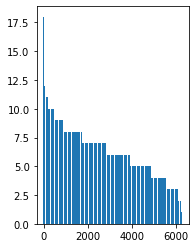

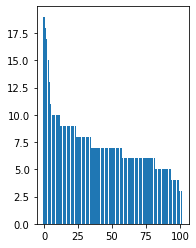

In [274]:
wc = dict(collections.Counter(nltk.word_tokenize(data)))
wc_len = {k: len(k) for k, v in wc.items()}
wc_len = dict(sorted(wc_len.items(), key=lambda k: k[1], reverse=True))

true_len = {i: len(i) for i in true_data_lst}
true_len = dict(sorted(true_len.items(), key=lambda k: k[1], reverse=True))


In [ ]:

plt.subplot(1, 2, 1)
plt.bar(range(len(wc_len)), list(wc_len.values()), align='center')
plt.show()

plt.subplot(1, 2, 2)
plt.bar(range(len(true_len)), list(true_len.values()), align='center')
plt.show()

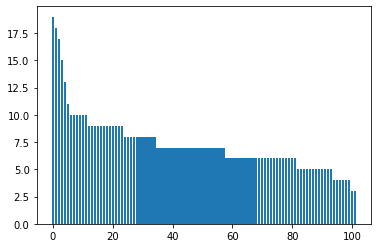

In [272]:


plt.bar(range(len(true_len)), list(true_len.values()), align='center')
plt.show()

In [338]:
TP

['gangling',
 'pliable',
 'trifle',
 'knobbly',
 'pasty',
 'seeker',
 'remembrall',
 'alchemy',
 'bludger',
 'snitch',
 'quaffle',
 'biased',
 'gryffindor',
 'phoenix',
 'fixedly',
 'tripe',
 'mangled',
 'kip',
 'abysmal',
 'chaser',
 'galoshes',
 'galleon',
 'herbology',
 'marmalade',
 'hogwarts',
 'flimsy',
 'sickle',
 'fanatic',
 'limp',
 'treacle',
 'muggle',
 'slytherin',
 'monkshood',
 'ravenclaw',
 'whelk',
 'berserk',
 'spasm',
 'riffraff',
 'bezoar',
 'pewter',
 'spindly',
 'beater',
 'ruffled',
 'ornate',
 'pub',
 'gringotts',
 'centaur',
 'rigid',
 'feeble',
 'stalactite',
 'prefect',
 'hufflepuff',
 'wolfsbane',
 'stoat',
 'diversion',
 'quidditch',
 'tuft',
 'contrary',
 'keeper',
 'askew',
 'disgruntled',
 'knickerbocker',
 'luminous',
 'tawny',
 'stalagmite',
 'gibber',
 'toil',
 'mystified',
 'rickety',
 'tyke',
 'hygienic',
 'transfiguration']

In [889]:
import nltk
from nltk.corpus import PlaintextCorpusReader

tokens = nltk.word_tokenize(full_data)
text = nltk.Text(tokens)

In [919]:
def remove_based_on_occurence(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if len(text.concordance_list(i))==0:
            keep.append(i)
        else:
            remove.append(i)
    return keep, remove

data_count_removed, count_removed = remove_based_on_occurence(data_noisy_removed)

In [920]:
len(data_count_removed), len(count_removed)

(137, 1311)

In [921]:
prec, TP, FP = precision(data_count_removed, true_data_lst)
rec, TP, FN = recall(data_count_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"F1 = {f1score(prec, rec)}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.0
Recall = 0.0


ZeroDivisionError: float division by zero

['beater',
 'berserk',
 'biased',
 'contrary',
 'diversion',
 'fanatic',
 'flimsy',
 'galleon',
 'galoshes',
 'gangling',
 'hygienic',
 'knickerbocker',
 'limp',
 'mystified',
 'ornate',
 'phoenix',
 'pliable',
 'pub',
 'rickety',
 'riffraff',
 'rigid',
 'seeker',
 'spasm',
 'stalactite',
 'toil',
 'tripe',
 'tuft',
 'whelk']